#  Tutorial 5 - PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn import decomposition
from sklearn import datasets
from pprint import pprint
np.random.seed(5)


# History
    Originally formulated by Pearson (1901) - English mathematician and biostatistician. He has been credited with establishing the discipline of mathematical statistics.
    Method of moments
    P-value
    Pearson's chi-squared test
    First introduction of the histogram
    

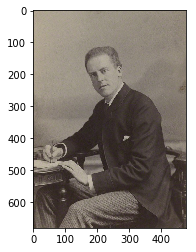

In [4]:
img=mpimg.imread('Portrait_of_Karl_Pearson.jpg')
imgplot = plt.imshow(img)
plt.show()

# Dimensionality reduction
    visualization
    Fewer dimensions ⇒ Less chances of overfitting ⇒ Better generalization
    Speeding up learning algorithms
    Less storage requirements (data compression)

    

# Iris data set:
    150 data examples
    Each with 4 features - petal and sepal width and length.

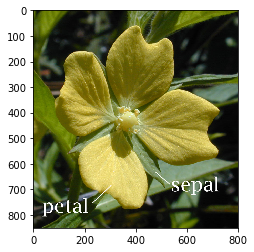

In [5]:
img=mpimg.imread('Petal-sepal.jpg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### plot distribution of each feature per class

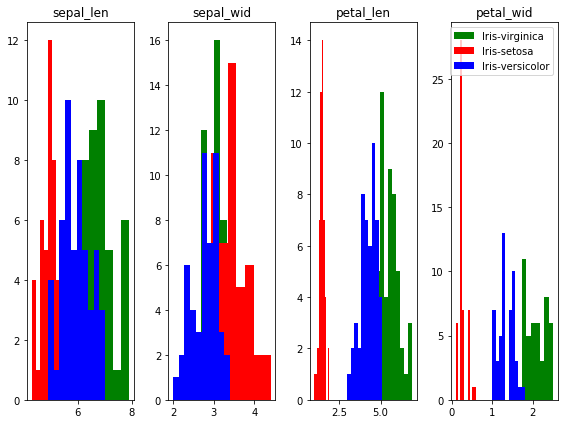

In [8]:
X = df.ix[:,0:4].values #take only the 4 features data
y = df.ix[:,4].values #take labels only
traces = []
legend = {0:False, 1:False, 2:False, 3:True}

colors = {'Iris-setosa': 'red', 
          'Iris-versicolor': 'blue', 
          'Iris-virginica': 'green'}

plt.rcParams['figure.figsize'] = (8,6)

f, axarr = plt.subplots(1,4)
for col in range(4):
    for key in colors:
        axarr[col].hist(X[y==key, col],
                                    stacked=True,
                                    facecolor=colors[key])
        axarr[col].set_title(df.columns[col])
axarr[col].legend(colors.keys()) 
plt.tight_layout()
plt.show()

In [9]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris() #this is built-in in sklearn
X = iris.data
y = iris.target  

# PCA -  Recap

    step 0 - Substract means
    step 1 - Calculate the covariance matrix
    step 2 - Choose k leading eigenvectors and project
    step 3 - Add means



# step 0: Substract means

In [10]:
X = X.T
mean_vec = np.mean(X, axis=1)
X_zero_mean = (X.T-mean_vec).T

In [11]:
X.shape # should be (number of features, number of examples)

(4L, 150L)

# step 1 - Calculate the covariance matrix

Given a data matrix $X_{m x n}$ - m features, n samples

The Covariance matrix is given by:

$$P = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})\;(\mathbf{X} - \mathbf{\bar{x}})^T \right) $$



In [12]:

cov_mat = X_zero_mean.dot(X_zero_mean.T) / (X.shape[1]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


# step 2 - Choose k leading eigenvectors and project

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

Eigenvalues 
[ 4.22484077  0.24224357  0.07852391  0.02368303]


### Same with SVD

In [14]:
u,s,v = np.linalg.svd(X_zero_mean/np.sqrt(X.shape[1]-1))
print('Eigenvectors \n%s' %u)
ss = np.square(s)
print('\nEigenvalues \n%s' %ss)

Eigenvectors 
[[-0.36158968 -0.65653988  0.58099728  0.31725455]
 [ 0.08226889 -0.72971237 -0.59641809 -0.32409435]
 [-0.85657211  0.1757674  -0.07252408 -0.47971899]
 [-0.35884393  0.07470647 -0.54906091  0.75112056]]

Eigenvalues 
[ 4.22484077  0.24224357  0.07852391  0.02368303]


In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Do we need to perform np.abs()???

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0]/sum(eig_vals))

Eigenvalues in descending order:
0.924616207174
0.0530155678505
0.017185139525
0.00518308545019


[array([ 0.07538379,  0.02236822,  0.00518309,  0.        ])]


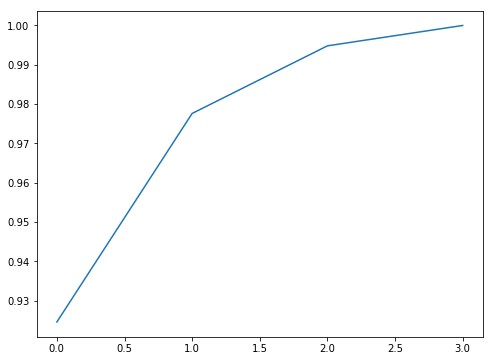

In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print([1-cum_var_exp])
plt.plot(cum_var_exp) 
plt.show()

# Compression

The projection matrix is a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a k-dimensional feature subspace, by choosing the "top k" eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

To understand the quality of the re-constructinon we measure the normalized reconstruction error: $$ err_k =\frac{\|pinv(W_k)*W_k*X-X\|^2}{\|x\|^2} $$

In [17]:
X_norm = np.linalg.norm(X_zero_mean,ord='fro')
for i in range(4,0,-1):
    W = eig_vecs[:,0:i]
    diff = ((np.linalg.pinv(W)).T).dot((W.T).dot(X_zero_mean))-X_zero_mean
    error = np.square(np.linalg.norm(diff,ord='fro')/X_norm)
    print str(i) + 'dimensions, error: ' + str(error)


4dimensions, error: 1.08611356606e-31
3dimensions, error: 0.00518308545019
2dimensions, error: 0.0223682249752
1dimensions, error: 0.0753837928257


As a thumb rule we take the amount of eigen vectors that allow 99% reconstruction error. In our example we can reduce the dimensionality to 3.
Also, note that the reconstruction error corresponds to the eigen value ratio as explained in class.

# Python has a built-in PCA imnplementation:

In [18]:
X = X.T
pca = decomposition.PCA(n_components=3) # creating a PCA object
pca.fit(X)
X3 = pca.transform(X)

#### Visualization in the lower dimensional space

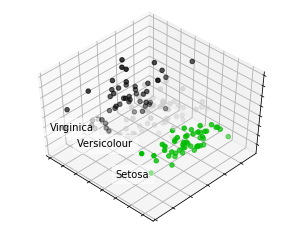

In [19]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X3[y == label, 0].mean(),
              X3[y == label, 1].mean() + 1.5,
              X3[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=y, cmap=plt.cm.spectral)

x_surf = [X3[:, 0].min(), X3[:, 0].max(),
          X3[:, 0].min(), X3[:, 0].max()]
y_surf = [X3[:, 0].max(), X3[:, 0].max(),
          X3[:, 0].min(), X3[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)
v0 = pca.transform(pca.components_[[0]])
v0 /= v0[-1]
v1 = pca.transform(pca.components_[[1]])
v1 /= v1[-1]

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# The transpose trick

$X_{m*n}$ m features, n samples.  
Typically, we compute the pca based on the covariance matrix, that is $$\frac{XX'}{n-1}$$.

The complexity of computing the covariance matrix is $m^2n$ and it requires memory of $m^2$. The complexity of finding its eigen vectors is $m^3$, therefore the total complexity is $m^2n$

#### What can we do if m >> n (much more features than samples)?
 

Solution - instead of computing the eigen values of $$\frac{XX'}{n-1}$$ compute the eigen values of $$\frac{X'X}{m-1}$$

What is the relation between the two?

If v is an eigen vector of XX' than: $$ XX'v=\lambda v $$

If we multiply it by X' from the left we get  $$ X'X(X'v)=\lambda(X'v)$$
Therefore X'v is an eigen vector of X'X.

And we are only left with getting the same eigen values by multiplying with $$\frac{m-1}{n-1}$$
(to get back to the original sample covariance matrix normalization)

Finally, by applying this trick the problem memory complexity is now ($n^2$) and the computational complexity is ($n^2m$).


# More about complexity - 
    

Eigen decomposition - O($n^3$) 

Correlation matrix - O{min($m^2n$)} 

PCA - O{min($m^2n$+$m^3$,$n^2m$+$n^3$)} = O{min($m^2n$,$n^2m$)}

SVD - O{min($m^2n$,$n^2m$)} - and has efficient implementations, specially if we need only k eigen vectors.

# Eigen faces

Apply PCA on face images data set - http://vis-www.cs.umass.edu/lfw/

In [20]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


C:\Users\eladl\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\eladl\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_olivetti_faces()

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
n_classes = len(set(y))

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

###############################################################################

Total dataset size:
n_samples: 400
n_features: 4096
n_classes: 40


In [22]:
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces(training data)"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

C:\Users\eladl\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Extracting the top 150 eigenfaces from 300 faces(training data)
done in 0.207s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.032s


Note that in this case m>n

In [23]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

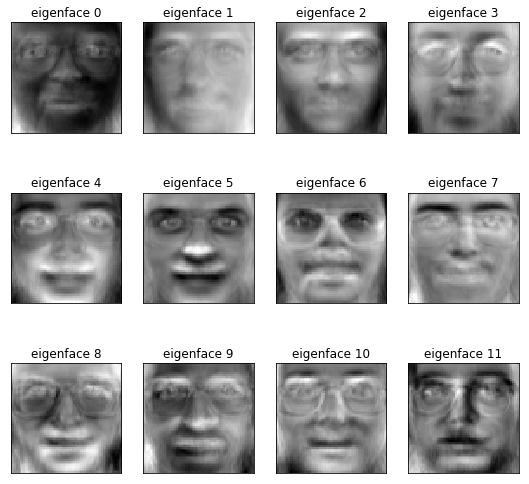

In [24]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)